In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [231]:
# Carregar o arquivo csv como um DataFrame
df = pd.read_csv('basic-analitycs.csv')

In [232]:
# Análise exploratória dos dados
print("Informações básicas sobre o DataFrame:")
print(df.info())
print("\nAmostra dos dados:")
print(df.head())


Informações básicas sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   customer_id  125000 non-null  object
 1   trans_date   125000 non-null  object
 2   tran_amount  125000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.9+ MB
None

Amostra dos dados:
  customer_id  trans_date  tran_amount
0      CS5295   11-Feb-13           35
1      CS4768  15-mar.-15           39
2      CS2122   26-Feb-13           52
3      CS1217  16-nov.-11           99
4      CS1850  20-nov.-13           78


In [233]:
# Calcular o número total de transações no conjunto de dados
total_transacoes = df.shape[0]
# Exibir o número total de transações
print("\nNúmero total de transações:", total_transacoes)


Número total de transações: 125000



Média das transações: 64.99
Desvio padrão das transações: 22.86


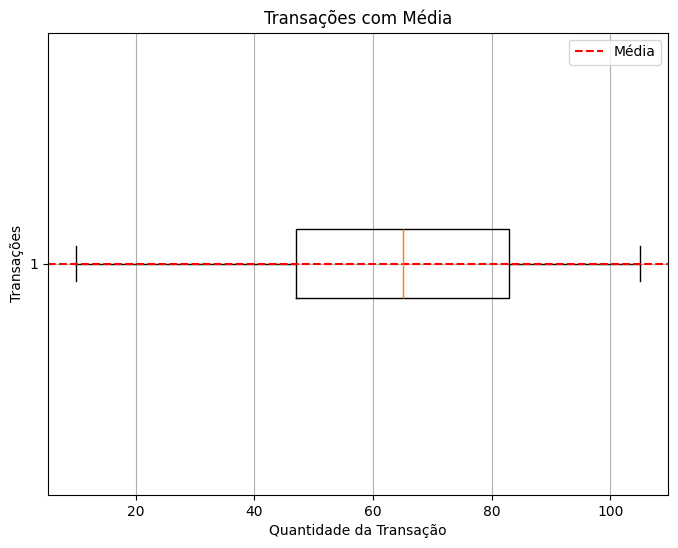

In [234]:
# Calcula a média e o desvio padrão das transações no conjunto de dados
media_transacoes = round(df['tran_amount'].mean(), 2)
desvio_padrao_transacoes = round(df['tran_amount'].std(), 2)

# Exibir a média e o desvio
print("\nMédia das transações:", media_transacoes)
print("Desvio padrão das transações:", desvio_padrao_transacoes)

# Cria o gráfico Média
plt.figure(figsize=(8, 6))
plt.boxplot(df['tran_amount'], vert=False)
plt.axhline(y=1, color='red', linestyle='--', label='Média')
plt.xlabel('Quantidade da Transação')
plt.ylabel('Transações')
plt.legend()
plt.title('Transações com Média')
plt.grid(True)
plt.show()

In [241]:
# Identificar os 10 clientes com a maior quantidade de transações
top_10_clientes = df['customer_id'].value_counts().nlargest(10)
print("\nTop 10 clientes com maior quantidade de transações:")
print(top_10_clientes)

# Calcular as médias transacionais dos top 10 clientes
medias_top_10_clientes = round(df.groupby('customer_id')['tran_amount'].mean().loc[top_10_clientes.index], 2)
print("\nMédias transacionais dos top 10 clientes:")
print(medias_top_10_clientes)


Top 10 clientes com maior quantidade de transações:
customer_id
CS4424    39
CS4320    38
CS3799    36
CS1215    35
CS5109    35
CS3805    35
CS2620    35
CS3013    35
CS4074    34
CS4998    34
Name: count, dtype: int64

Médias transacionais dos top 10 clientes:
customer_id
CS4424    75.21
CS4320    69.66
CS3799    69.81
CS1215    67.49
CS5109    71.60
CS3805    70.09
CS2620    67.43
CS3013    64.54
CS4074    72.41
CS4998    69.35
Name: tran_amount, dtype: float64


In [243]:
# Cria uma nova coluna no DataFrame com a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['data_recente'] = df.groupby('customer_id')['trans_date'].transform('max')

,customer_id,trans_date,tran_amount,data_recente
0,CS5295,2013-02-11,35,2014-11-25
1,CS4768,2015-03-15,39,2015-03-15
2,CS2122,2013-02-26,52,2015-02-23
3,CS1217,2011-11-16,99,2014-12-29
4,CS1850,2013-11-20,78,2015-03-09
...,...,...,...,...
124995,CS8433,2011-06-26,64,2014-12-30
124996,CS7232,2014-08-19,38,2014-09-01
124997,CS8731,2014-11-28,42,2015-02-28
124998,CS8133,2013-12-14,13,2014-12-20


Quantidade média de transações por cliente: 18.14


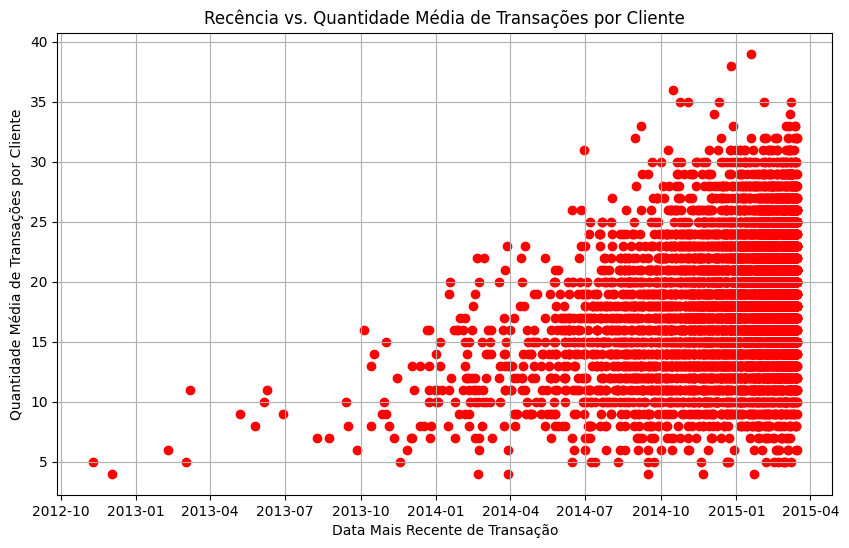

In [240]:
# Calcular a data mais recente de transação de cada cliente
df['trans_date'] = pd.to_datetime(df['trans_date'], format='%d-%b-%y')
recent_date_per_customer = df.groupby('customer_id')['trans_date'].max()

# Calcular a quantidade média de transações por cliente
media_transacoes_por_cliente = round(df.groupby('customer_id').size().mean(), 2)

# Exibir a quantidade média de transações de todos os clientes
print("Quantidade média de transações por cliente:", media_transacoes_por_cliente)

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(recent_date_per_customer, df.groupby('customer_id').size(), color='red')
plt.xlabel('Data Mais Recente de Transação')
plt.ylabel('Quantidade Média de Transações por Cliente')
plt.title('Recência vs. Quantidade Média de Transações por Cliente')
plt.grid(True)
plt.show()